# Reinforcement Learning with Random Input Data

Santos, Alwin Denz S. | DS167 - Special Topics

**Objective**: <br> 
<div style="text-align: justify">The goal of this assignment is to provide students with hands-on experience in implementing reinforcement learning techniques using Python, particularly within the Jupyter Anaconda environment. Students will work on a simple problem and a randomly generated input dataset to develop their understanding of reinforcement learning concepts and visualize the results. </div>

# Problem Definition

## <center> Suez Canal Ship Naviagation: Avoiding another Ever Given Scenario

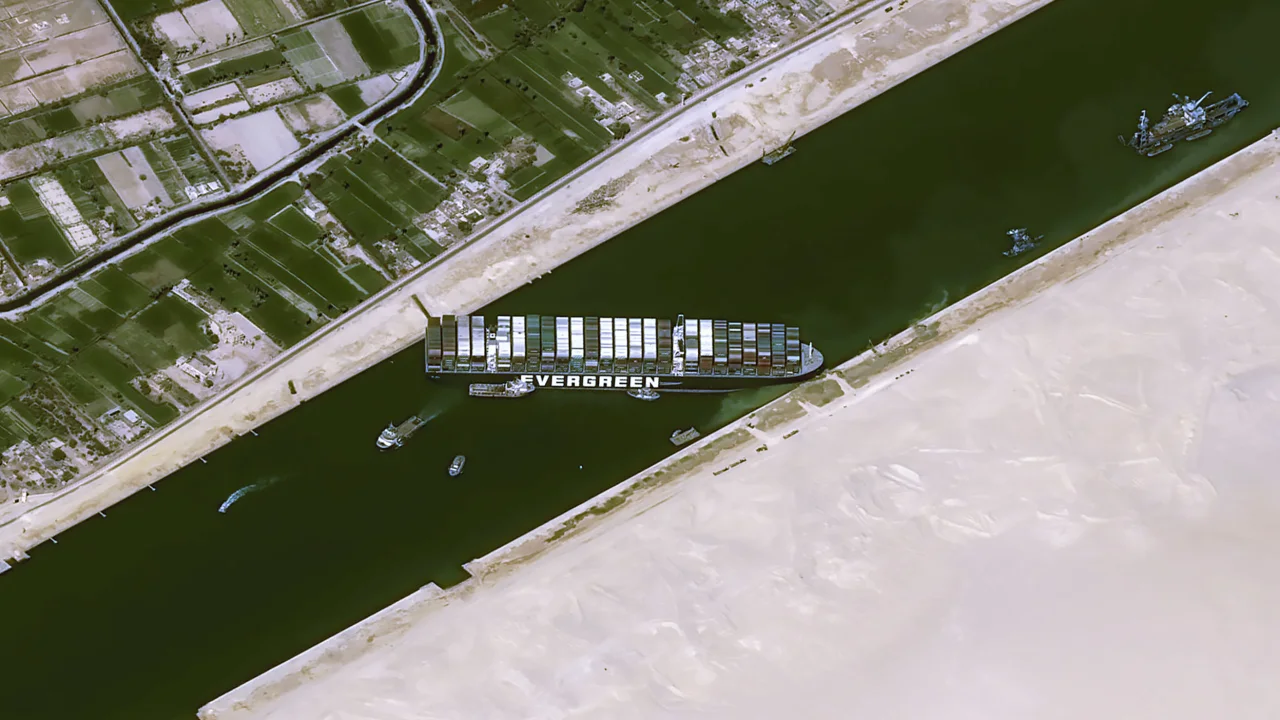
© Cnes 2021, Distribution Airbus DS

Ever Given, one of the largest container ships ever built, became stuck in the Suez Canal for six days in 2021, halting nearly $10 billion in daily trade. While strong winds played a role in the ship's detour, The New York Times discovered that a series of commands issued by Egyptian pilots appears to have exacerbated the situation (The New York Times, 2021). Thus, the objective is to create a simple automated navigation using reinforcement learning that trains the agents to avoid hitting the banks of the canal.

**where:**
- **Agent:** the cargo ship
- **Environment:** the narrow paths of Suez Canal (in a 6x6 grid)
- **Actions:**
    - 0: Up
    - 1: Down
    - 2: Left
    - 3: Right
- **States:** different locations in the Suez Canal
- **Rewards/Punishment:**
    - -30: Punishment for hitting the banks of the canal
    - +100: Awarded for reaching the goal destination
    - +1: Awarded for every action of the ship on safe states.
    
Thus, the RL implementation on cargo ships passing on Suez canal aims to help cargo ships to learn smart actions. Cargo ships will learn to act according to rewards and punishments.


# Creation of Environment

In [2]:
# Uncomment to install necessary libraries
# !pip install gym
# !pip install numpy

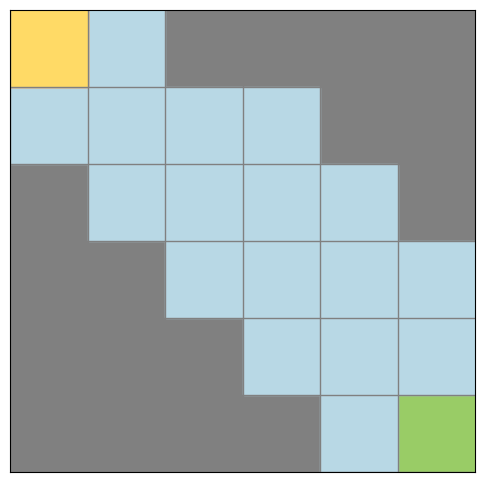

In [119]:
import gym
from gym import spaces
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

class SuezCanalGrid(gym.Env):
    def __init__(self):
        # Initialize grid size and action/observation spaces
        self.grid_size = 6
        self.action_space = spaces.Discrete(4) # Four possible actions: Up, Down, Left, Right
        self.observation_space = spaces.Discrete(self.grid_size * self.grid_size)
        
        # Define start and goal positions
        self.start_position = (0, 0)
        self.goal_position = (self.grid_size - 1, self.grid_size - 1)
        
        # Define obstacle positions
        self.obstacle_positions = [(2,0), (0,2),(3, 0), (3, 1), (4, 0), (4, 1), (4, 2), (5, 0), (5, 1), (5, 2), (5, 3),
                                  (0,3), (0, 4), (0, 5),(1, 4), (1, 5), (2, 5)]
        
        # Initialize current position, punishment, and punishment treshold
        self.current_position = self.start_position
        self.punishment = 0
        self.punishment_threshold = 100

    def reset(self):
        # Reset current position to the start position
        self.current_position = self.start_position
        return self._position_to_observation(self.current_position)
    
    def step(self, action):
        if action == 0:  # Up
            new_position = (max(0, self.current_position[0] - 1), self.current_position[1])
        elif action == 1:  # Down
            new_position = (min(self.grid_size - 1, self.current_position[0] + 1), self.current_position[1])
        elif action == 2:  # Left
            new_position = (self.current_position[0], max(0, self.current_position[1] - 1))
        elif action == 3:  # Right
            new_position = (self.current_position[0], min(self.grid_size - 1, self.current_position[1] + 1))
            
        done = False
        
        # Check if the new position is on the obstacle
        if new_position in self.obstacle_positions:
            self.current_position = new_position
            reward = -30  # Penalty for moving to an obstacle
            self.punishment += 5
            done = False    # Terminate episode when obstacle is reached
        else:
            self.current_position = new_position
            reward = +1  # Penalty for each action taken
            done = False

            # Check if the goal is reached
            if self.current_position == self.goal_position:
                self.current_position = new_position
                reward += 100
                done = True  # Terminate episode when goal is reached

        if self.punishment >= self.punishment_threshold:
            # Reset to start position and reset punishment if threshold is exceeded
            self.current_position = self.start_position
            self.punishment = 0
            done = True

        return self._position_to_observation(self.current_position), reward, done, {}

    def _position_to_observation(self, position):
        # Convert a (row, col) position to a flat observation index
        return position[0] * self.grid_size + position[1]
    
    def render(self):
        # Render the environment using matplotlib
        fig, ax = plt.subplots(figsize=(self.grid_size, self.grid_size))
        ax.set_xlim(0, self.grid_size)
        ax.set_ylim(0, self.grid_size)
        ax.set_xticks(range(self.grid_size))
        ax.set_yticks(range(self.grid_size))

        for x in range(self.grid_size):
            ax.axvline(x, color='gray', linewidth=1)
            ax.axhline(x, color='gray', linewidth=1)

        # Draw gray obstacles
        for obstacle_position in self.obstacle_positions:
            ax.add_patch(plt.Rectangle((obstacle_position[1], self.grid_size - 1 - obstacle_position[0]), 1, 1, color='gray'))

        # Draw red start position
        ax.add_patch(plt.Rectangle((self.start_position[1], self.grid_size - 1 - self.start_position[0]), 1, 1, color='#ff6633'))

        # Draw green goal position
        ax.add_patch(plt.Rectangle((self.goal_position[1], self.grid_size - 1 - self.goal_position[0]), 1, 1, color='#99cc66'))

        # Draw blue color to represent the water in the canal
        for i in range(self.grid_size):
            for j in range(self.grid_size):
                if (i, j) not in self.obstacle_positions and (i, j) != self.current_position and (i, j) != self.goal_position:
                    ax.add_patch(plt.Rectangle((j, self.grid_size - 1 - i), 1, 1, color='#b8d8e5'))
         # Draw red start position
        ax.add_patch(plt.Rectangle((self.start_position[1], self.grid_size - 1 - self.start_position[0]), 1, 1, color='#ff6633'))
        
        # Draw yellow agent's current position
        ax.add_patch(plt.Rectangle((self.current_position[1], self.grid_size - 1 - self.current_position[0]), 1, 1, color='#ffda66'))
        
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        plt.show()

# Create an instance of the environment and rest it
env = SuezCanalGrid()
observation = env.reset()

# Render the initial state of the environment
env.render()

This is a translation of the Suez Canal problem into OpenAI's `gym` library. The gray areas represent the canal's banks, the red areas represent the start, the green areas represent the destination, and the blue areas represent the water that the cargo ships must navigate.

In [120]:
# Animating the environment for 1000 loops
for _ in range(1000):
    # Render the current state of the environment
    env.render()
    
    # Pause to visualize the rendered environment
    time.sleep(0.01)
    
    # Clear the previous output to update the visualization
    clear_output(wait=True)
    
    # Chosse a random action from the action space
    action = env.action_space.sample()
    
    # Take a step in the environment with the chosen action
    observation, reward, done, _ = env.step(action)
    
    # Check if the agent has reached the goal position (target state)
    if observation == env._position_to_observation(env.goal_position):
        print("Destination Reached.")
        break
        

Destination Reached.


> The provided code snippet demonstrates an agent's interaction with a simulated environment that models the Suez Canal problem using the gym framework. The agent's behavior is evaluated over 1000 iterations, and the code outputs "Destination Reached" upon successfully reaching the goal position.

> In this environment, cargo ships navigate the canal with the possibility of encountering obstacles, which can be tolerated to a certain extent before leading to severe consequences. These impacts incur substantial negative rewards, commonly referred to as punishments.

> The primary objective of the agent is to efficiently navigate the canal to reach its destination while minimizing punishments and aiming for a positive cumulative reward. The agent learns through a combination of exploration and exploitation, adapting its actions based on the rewards received for its decisions. Over time, the agent refines its strategy and progressively improves its performance.

> The code execution not only showcases the agent's navigation through the canal but also illustrates the learning process, whereby the agent learns to avoid obstacles, minimize punishments, and maximize rewards. This process aligns with the core concepts of reinforcement learning, where agents learn by interacting with their environment to achieve predefined goals.

> By simulating the Suez Canal problem and utilizing reinforcement learning techniques, the code offers insights into how intelligent agents can be trained to make optimal decisions in complex scenarios while considering rewards and penalties.

In [121]:
states_number = env.observation_space.n
actions_number = env.action_space.n
print("There are ", states_number, " possible states the grid is 6x6. In addition, there are ", actions_number,
      " actions used.")

There are  36  possible states the grid is 6x6. In addition, there are  4  actions used.


# Implementation

## Q-Learning Algorithm

$$Q(s, a) = (1 - \alpha) \cdot Q(s, a) + \alpha \cdot \left( r + \gamma \cdot \max_{a'} Q(s', a') \right)$$


**where:**

- $Q(s, a)$ is the Q-value of state $s$ and action $a$.
- $\alpha$ (alpha) is the learning rate
- $r$ is the immediate reward obtained after tacion an action $a$ in state $s$.
- $\gamma$ (gamma) is the discount factor
- $\max_{a'} Q(s', a')$ is the estimated maximum Q-value of the next-state $s'$ after taking action $a'$.

> <div style="text-align: justify">This is a fundamental algorithm in reinforcement learning as it is used to learn optimal policies for agents in an environment. It <b> aims to find the best action to take in a given state to maximize cumulative rewards over time. </b></div> <br>
>
> <div style="text-align: justify"> In the context of machine learning, the Q-value (also known as the action-value function) represents the expected cumulative reward an agent can obtain by taking a specific action in a given state and then following a particular policy to make subsequent decisions. Q-values are essential in decision-making processes, helping the agent to determine which actions to take in order to maximize its long-term cumulative reward. </div>

### Initializing Parameters to determine Exploration and Exploitation

In [122]:
learning_rate = 0.1     # alpha
discount_factor = 0.5   # gamma
initial_epsilon = 0.7   # Initial ε-greedy policy parameter
minimum_epsilon = 0.1   # Minimum ε value
epsilon_decay = 0.999   # Epsilon decay factor

> - **Initial ε-greedy policy parameter**(`initial_epsilon`): This parameter sets the initial exploration factor. A higher value encourages more exploration by favoring random actions over exploiting known Q-values. 

> - **Minimum ε value** (`minimum_epsilon`): This defines the lower bound for the exploration factor. As agent learns and gains more experience, it aims to exploit known information more.

> - **Epsilon Decay Factor** (`epsilon_decay`): This factor controls the rate at which the exploration factor decreases over time. It determines how fast the agent transitions from exploration to exploitation.

### 2. Reinforcement Learning Algorithm using the Q-learning approach

Implement a reinforcement learning algorithm using the Q-learning approach. Provide students with the necessary code structure and guidance to set up the learning process. Ensure that the algorithm updates the Q-values based on rewards and chosen actions.

In [123]:
# Starting the Q-table with zeros
Q = np.zeros((states_number, actions_number))
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [124]:
# Perform Q-learning
num_episodes = 1000
epsilon = initial_epsilon 
dataset = {'State': [], 'Action': [], 'Reward': [], 'NextState': []}
totalrewards_df = {'Episode': [], 'Steps': [], 'TotalReward': []}

for episode in range(num_episodes):
    state = env.reset()
    done = False
    total_reward = 0
    steps = 0
    
    while not done:
        if np.random.rand() < epsilon:
            action = env.action_space.sample()  # Choose a random action with probability ε
        else:
            action = np.argmax(Q[state, :])  # Choose the best action with probability 1-ε
        
        # Take the chosen action and observe the next state and reward
        nextstate, reward, done, _ = env.step(action)
        
        # Q-learning update
        best_next_action = np.argmax(Q[nextstate, :])
        Q[state, action] += learning_rate * (reward + discount_factor * Q[nextstate, best_next_action] - Q[state, action])
        
        dataset['State'].append(state)
        dataset['Action'].append(action)
        dataset['Reward'].append(reward)
        dataset['NextState'].append(nextstate)
        
        print(f"Episode {episode + 1}: Action={action}, State={state}, Reward={reward}, Next State={nextstate}, Done={done}")
        state = nextstate
        steps += 1
        total_reward += reward
        
    # Update epsilon with decay, ensuring it doesn't go below the minimum
    epsilon = max(minimum_epsilon, epsilon * epsilon_decay)

    
    totalrewards_df['Episode'].append(episode+1)
    totalrewards_df['Steps'].append(steps)
    totalrewards_df['TotalReward'].append(total_reward)
    
totalrewards_df = pd.DataFrame(totalrewards_df)


Episode 1: Action=1, State=0, Reward=1, Next State=6, Done=False
Episode 1: Action=1, State=6, Reward=-30, Next State=12, Done=False
Episode 1: Action=0, State=12, Reward=1, Next State=6, Done=False
Episode 1: Action=0, State=6, Reward=1, Next State=0, Done=False
Episode 1: Action=1, State=0, Reward=1, Next State=6, Done=False
Episode 1: Action=0, State=6, Reward=1, Next State=0, Done=False
Episode 1: Action=3, State=0, Reward=1, Next State=1, Done=False
Episode 1: Action=2, State=1, Reward=1, Next State=0, Done=False
Episode 1: Action=1, State=0, Reward=1, Next State=6, Done=False
Episode 1: Action=0, State=6, Reward=1, Next State=0, Done=False
Episode 1: Action=3, State=0, Reward=1, Next State=1, Done=False
Episode 1: Action=2, State=1, Reward=1, Next State=0, Done=False
Episode 1: Action=3, State=0, Reward=1, Next State=1, Done=False
Episode 1: Action=3, State=1, Reward=-30, Next State=2, Done=False
Episode 1: Action=0, State=2, Reward=-30, Next State=2, Done=False
Episode 1: Action

### Random Input Generation Dataset

Generate a random input dataset that represents the problem scenario. This dataset should include information such as the agent's current state, possible actions, rewards, and next states. You can use libraries like numpy to create random datasets.

In [125]:
# Create a DataFrame to display the dataset
df = pd.DataFrame(dataset)
df.tail()

,State,Action,Reward,NextState
27517,15,1,1,21
27518,21,1,1,27
27519,27,3,1,28
27520,28,3,1,29
27521,29,1,101,35


In [126]:
pd.set_option('display.max_rows', None)
episode_per_ten = pd.DataFrame(totalrewards_df)
episode_per_ten[episode_per_ten['Episode'] % 10 == 0].reset_index(drop = True)

,Episode,Steps,TotalReward
0,10,111,-509
1,20,188,-432
2,30,211,-409
3,40,64,-401
4,50,25,-68
5,60,62,-310
6,70,13,-204
7,80,13,-235
8,90,11,-113
9,100,248,-372


### Function creation, updating Q-values, and tracking learning progress

Instruct students to create functions to simulate agent-environment interactions, update Q-values, and track the learning progress over a defined number of episodes.

# Visualization

In [127]:
q_table = pd.DataFrame(Q, columns=[f'Action {i}' for i in range(Q.shape[1])])
q_table

,Action 0,Action 1,Action 2,Action 3
0,2.096678,2.193336,2.096677,2.193359
1,2.193322,2.386719,2.096655,-28.620821
2,-28.661917,2.773437,2.182133,-28.408653
3,-26.513411,3.512808,-28.371553,-38.436963
4,-28.394193,-24.579810,-24.926234,-26.421059
5,-21.639423,-22.871778,-22.729909,-21.650327
6,2.079979,-28.675482,2.160689,2.386719
7,2.193340,2.773391,2.193321,2.773437
8,-28.613389,3.546875,2.386701,3.546807
9,-28.335353,5.093750,2.721512,-26.269350


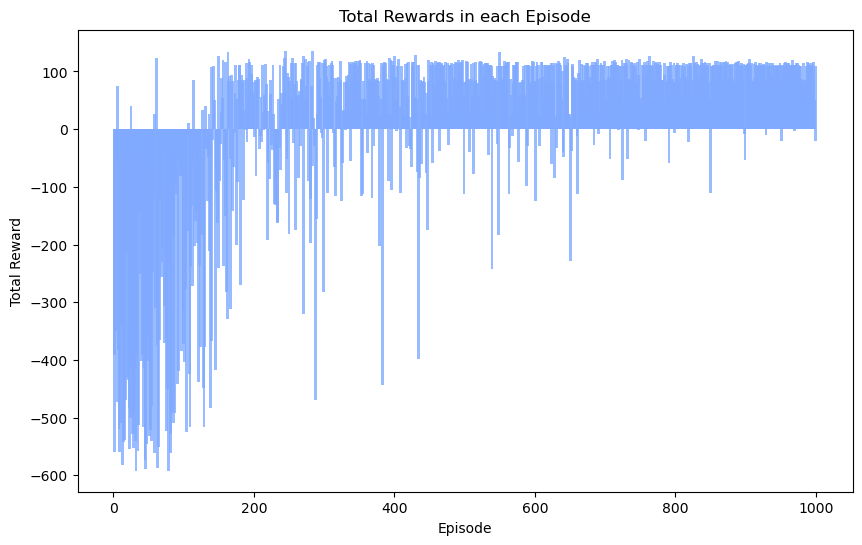

In [149]:
plt.figure(figsize=(10, 6))

# Set the color based on episode range
colors = ['#80aaff' if episode <= 125 else '#80aaff' for episode in totalrewards_df['Episode']]

plt.bar(totalrewards_df['Episode'], totalrewards_df['TotalReward'], color=colors, width=4, alpha = 0.8)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Rewards in each Episode')
plt.show()


> The learning curve typically starts with low total rewards as the agent explores and gradually learns about the environment. As it gathers more information and updates its Q-values, the rewards increase. Eventually, the agent converges to an optimal or near-optimal policy, and the total rewards stabilize as the agent consistently chooses actions that yield better outcomes. 

> The initial low total rewards reflect the agent's exploration phase and lack of knowledge about the environment. **As the agent learns and refines its strategy through Q-value updates, the total rewards gradually improve and become steady, indicating that the agent has learned an effective policy for maximizing rewards.**

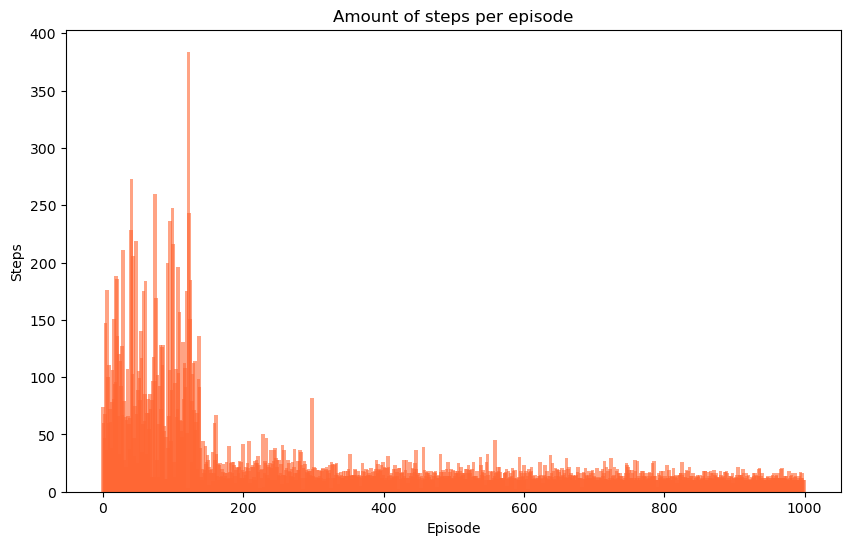

In [145]:
# Extract 'Steps' and 'Episode' columns from totalrewards_df
steps_total = totalrewards_df['Steps']
episodes = totalrewards_df['Episode']

plt.figure(figsize=(10, 6))
plt.title("Amount of steps per episode")
plt.bar(range(len(steps_total)), steps_total, alpha=0.6, color='#ff6633', width=5)
plt.xticks_indices = range(0, len(episodes), 200)
plt.xlabel('Episode')
plt.ylabel('Steps')
plt.show()

> The graph **shows a high number of steps at the start and becomes steady in the latter part of the training process**. This is a typical behavior in reinforcement learning, particularly Q-learning. It can be attributed to how the agent learns and explores the environment.

> In the beginning, when the agent is exploring the environment, it takes a lot of random actions to gather information about the consequences of its actions. This is the main cause of the high number of steps, as the agent tries several different actions to learn about the environment.

> Over time, the agent's Q-values become more accurate through learning. **It becomes better at choosing actions that lead to the desired goal leading to more efficient paths taken and a smaller number of steps.** This is called the natural progression in the learning process of reinforcement learning.

**References:**

- How one of the world’s biggest ships jammed the Suez Canal (Published 2021). (2021, July 19). The New York Times - Breaking News, US News, World News and Videos. https://www.nytimes.com/2021/07/17/world/middleeast/suez-canal-stuck-ship-ever-given.html

- Sarjit07. (2022, March 16). Reinforcement learning using Q-table - FrozenLake. Kaggle: Your Machine Learning and Data Science Community. https://www.kaggle.com/code/sarjit07/reinforcement-learning-using-q-table-frozenlake